In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('C:\\Users\\narra\\OneDrive\\Desktop\\B-tech\\sems\\Sem-5\\Data Analytics\\project\\AQI.csv')

# Explore the first few rows of the dataset before cleaning
print("First Few Rows of the Dataset (Before Cleaning):")
print(df.head())

First Few Rows of the Dataset (Before Cleaning):
        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


In [12]:
# Data Cleaning Process
df=df.dropna()
df.drop_duplicates(inplace=True) # Drop duplicate rows

# Explore the first few rows of the cleaned dataset
print("\nFirst Few Rows of the Dataset (After Cleaning):")
print(df.head())


First Few Rows of the Dataset (After Cleaning):
           City        Date  PM2.5    PM10    NO    NO2    NOx    NH3    CO  \
2123  Amaravati  2017-11-25  81.40  124.50  1.44  20.50  12.08  10.72  0.12   
2124  Amaravati  2017-11-26  78.32  129.06  1.26  26.00  14.85  10.28  0.14   
2125  Amaravati  2017-11-27  88.76  135.32  6.60  30.85  21.77  12.91  0.11   
2126  Amaravati  2017-11-28  64.18  104.09  2.56  28.07  17.01  11.42  0.09   
2127  Amaravati  2017-11-29  72.47  114.84  5.23  23.20  16.59  12.25  0.16   

        SO2      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
2123  15.24  127.09     0.20     6.50    0.06  184.0   Moderate  
2124  26.96  117.44     0.22     7.95    0.08  197.0   Moderate  
2125  33.59  111.81     0.29     7.63    0.12  198.0   Moderate  
2126  19.00  138.18     0.17     5.02    0.07  188.0   Moderate  
2127  10.55  109.74     0.21     4.71    0.08  173.0   Moderate  


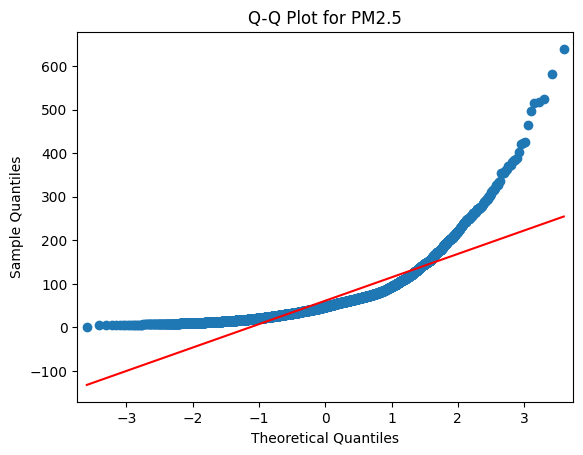

In [13]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Select the column for which you want to check the normal distribution
selected_column = 'PM2.5'

# Create a Q-Q plot
sm.qqplot(df[selected_column], line='s')

plt.title(f'Q-Q Plot for {selected_column}')
plt.show()

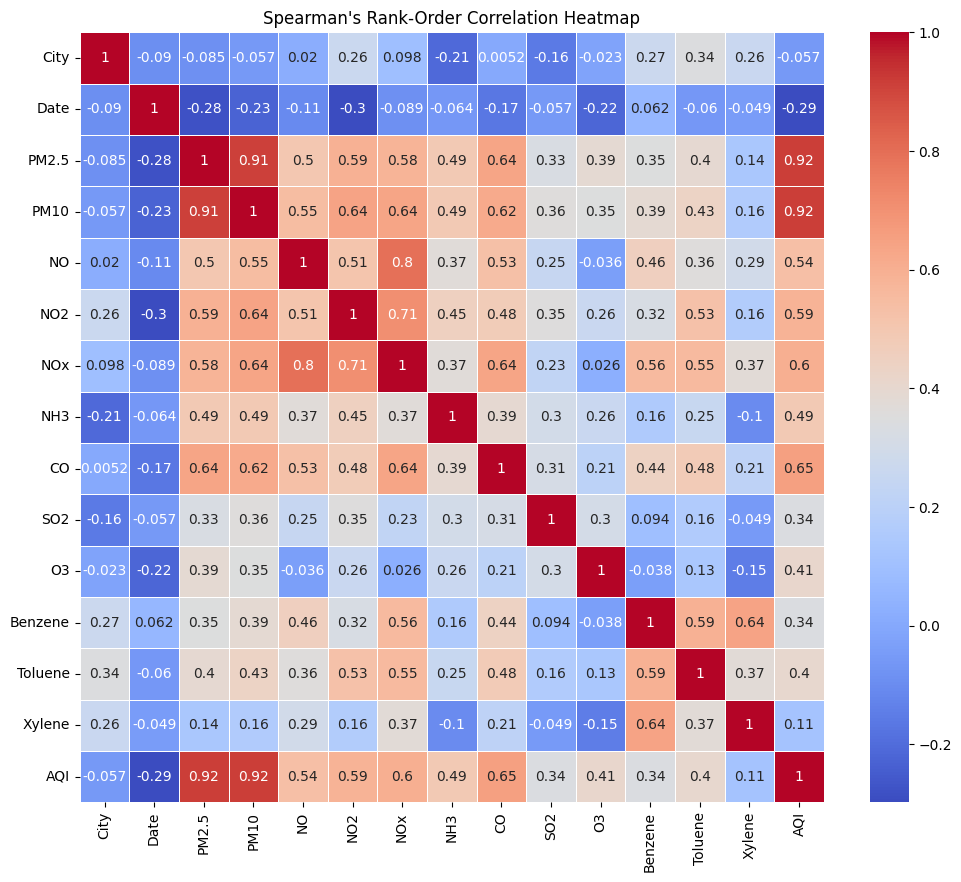

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Select columns for which you want to calculate Spearman's correlation
selected_columns = ['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

# Create a DataFrame to store the results
correlation_results = pd.DataFrame(index=selected_columns, columns=selected_columns)

# Calculate Spearman's correlation for all combinations
for col1 in selected_columns:
    for col2 in selected_columns:
        correlation, _ = spearmanr(df[col1], df[col2])
        correlation_results.loc[col1, col2] = correlation

# Convert the correlation matrix to numeric format
correlation_results = correlation_results.apply(pd.to_numeric)

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_results, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Spearman's Rank-Order Correlation Heatmap")
plt.show()


Unique Years: [2017 2018 2019 2020 2015 2016]
Kruskal-Wallis Test Result: KruskalResult(statistic=734.6909898389407, pvalue=1.5474857118060046e-156)


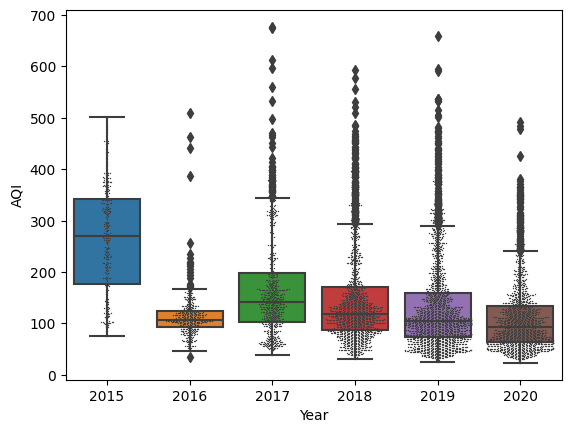

In [18]:
import pandas as pd
import seaborn as sns
from scipy.stats import kruskal

# Assuming your DataFrame is named 'data' and has columns 'City', 'Date', 'AQI', ...
# Make sure to replace 'YourColumnName1', 'YourColumnName2', ... with the actual column names in your DataFrame

# Load your dataset or define 'data' if not already done
# data = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with your actual file path

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'Date' column and create a new 'Year' column
df['Year'] = df['Date'].dt.year

# Print unique years for debugging
print("Unique Years:", df['Year'].unique())

# Select relevant columns for analysis
columns_for_comparison = ['Year', 'AQI']  # Replace with actual column names

# Perform Kruskal-Wallis test to compare AQI values among different years
kruskal_result = kruskal(*[group['AQI'].values for _, group in df.groupby('Year')])

# Print the Kruskal-Wallis test result
print("Kruskal-Wallis Test Result:", kruskal_result)

# Visualize the results using a box plot
sns.boxplot(x='Year', y='AQI', data=df)
sns.swarmplot(x='Year', y='AQI', data=df, color=".25",size=1)  # Add swarmplot for better visibility of data points

# Show the plot
import matplotlib.pyplot as plt
plt.show()


C:\Users\narra\AppData\Local\Temp\ipykernel_15132\2177892658.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='City', y='AQI', hue='Pandemic', data=df, ci=None)


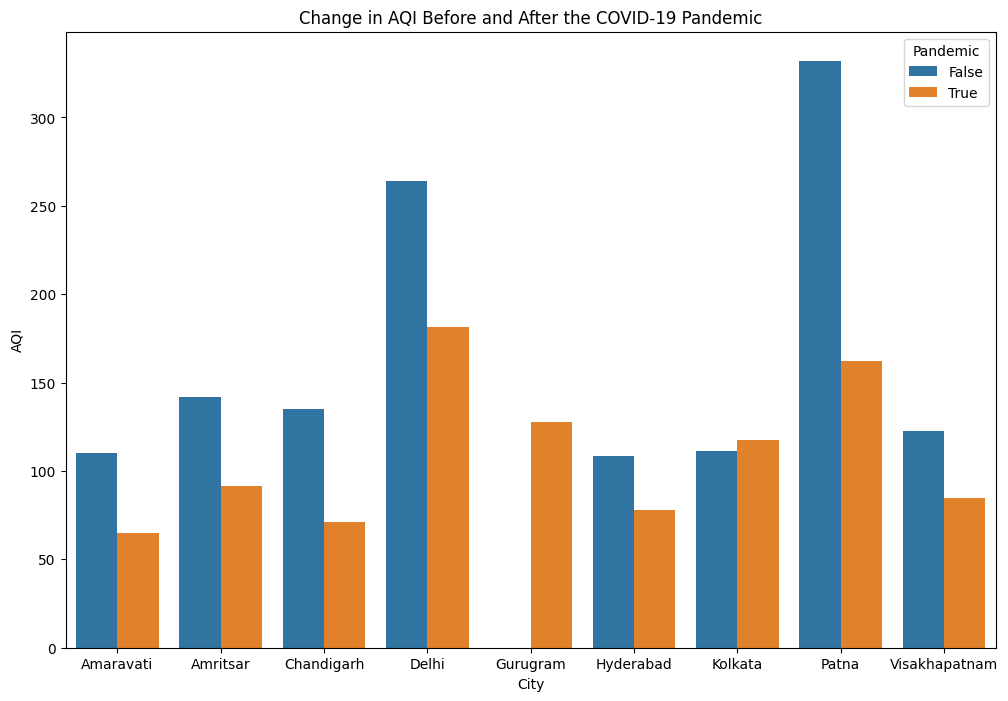

City
Amaravati        (0.0, 1.3768780683323076e-22)
Amritsar         (0.0, 1.6229360165528496e-27)
Chandigarh       (0.0, 1.2786495923817355e-31)
Delhi              (0.0, 8.79480837945766e-32)
Gurugram          (0.0, 2.868897372228846e-21)
Hyderabad         (0.0, 8.751996571446381e-32)
Kolkata           (0.0, 8.774705851405365e-32)
Patna              (0.0, 8.79318077847355e-32)
Visakhapatnam    (0.0, 3.8337917363811865e-30)
dtype: object


In [20]:
import pandas as pd
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'data' with columns 'AQI', 'City', and 'Date'
# Replace 'YourDataFrame' with the actual DataFrame name

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create a new column indicating whether the date is before or after the pandemic
df['Pandemic'] = df['Date'] >= '2020-01-01'

# Select relevant columns for analysis
columns_for_analysis = ['AQI', 'City', 'Pandemic']

# Perform Wilcoxon signed-rank test for each city
wilcoxon_results = df.groupby('City').apply(lambda x: wilcoxon(x[x['Pandemic']]['AQI'], zero_method='wilcox', alternative='two-sided'))

# Visualize change in AQI with a bar graph for each city
plt.figure(figsize=(12, 8))
sns.barplot(x='City', y='AQI', hue='Pandemic', data=df, ci=None)
plt.title('Change in AQI Before and After the COVID-19 Pandemic')
plt.xlabel('City')
plt.ylabel('AQI')
plt.legend(title='Pandemic')
plt.show()

# Print Wilcoxon signed-rank test results
print(wilcoxon_results)
